Importing the libraries


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the Datasets
New Section

In [39]:

dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

# training_set

Feature Scaling

In [40]:
# There is standardization and normalization ( 0 to 1 )
# Here we use Normalization, this is efficient here
# Here we require min max class so we use scikit Learn

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# print(training_set_scaled[1:11])

Creating a data structure with 60 timesteps and 1 output

In [41]:
# 60 time step is experimental
# 60 previous fincancial days are used to find the 1 output
X_train = []
y_train = []

# This is just a sliding window of 60 values
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
# print(X_train[1:3])
X_train, y_train = np.array(X_train), np.array(y_train)
# print(X_train[1:3])

# So finally we gor the training and the test dataset

Reshaping 3 Dimension

In [42]:
# 3D - (batch size, time steps, input dim)
# Here we just convert the 2D data into the 3D

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# X_train[1]

## Building the RNN

Importing the Keras Libraries and Packages

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Initialising the RNN

In [44]:
regressor = Sequential()

In [45]:
# First Layer
# The LSTM requires 3 parameters
# For the dimenstions the first dimension automatically calculated so enough to mention only 2 dimensions


regressor.add(LSTM(units = 50, return_sequences = True, input_shape =( X_train.shape[1], 1)))

# Adding dropout class to avoid overfitting

# Most of peoples use 20% dropout rate
regressor.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Adding second LSTM layer and some Dropout regularisation

In [46]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding Third LSTM layer and Dropout Regularisation

In [47]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding Fourth LSTM later and Dropout Regularisation

In [48]:
# This is not the last layer
# But this is the final LSTM layer so there is no return
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Adding the Output Layer

In [49]:
regressor.add(Dense(units = 1))

Compile the Output

In [52]:
# Here we work with continuos data (Regressor)
# So we wont use Binary Cross Entropy Here, we use Mean Squared error MSE
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Fitting the RNN to the Training set|

In [53]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - loss: 0.0940
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0065
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0057
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0048
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0054
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - loss: 0.0049
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0057
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0045
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - loss: 0.0047
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0035
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0044
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0037
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - loss: 0.0040
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 0.0042
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6

## Making the Prediction and visualising the results

Importing the Test dataset - Real Stock price of 2017

In [54]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

Getting the predicated stock price of 2017

In [72]:
# We concat the training and test data set for the prediction
# We need to menttin the dim inside the concat , Horizontal = 1, Vertical = 0

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

# We need to get the range from Jan3 2017 first day of Test data - 60 to the end of the test data

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# print(inputs)
inputs = inputs.reshape(-1, 1)
# print(inputs)
# Applying Feature scaling
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

# print(X_test) we need to change the Dimenstion to 3D before apply to the mode
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# print(X_test)
predicted_stock_price = regressor.predict(X_test)
# print(predicted_stock_price)
# The output in the Feature scaled so we need to inverse that

predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[797.24615]
 [794.486  ]
 [794.5803 ]
 [795.8595 ]
 [799.08093]
 [804.8569 ]
 [810.29346]
 [812.71155]
 [813.27484]
 [813.1871 ]
 [813.0207 ]
 [812.79004]
 [812.6102 ]
 [813.1122 ]
 [814.05273]
 [818.553  ]
 [825.38965]
 [832.81335]
 [837.0179 ]
 [833.2817 ]]


Visualising the Result

<function matplotlib.pyplot.show(close=None, block=None)>

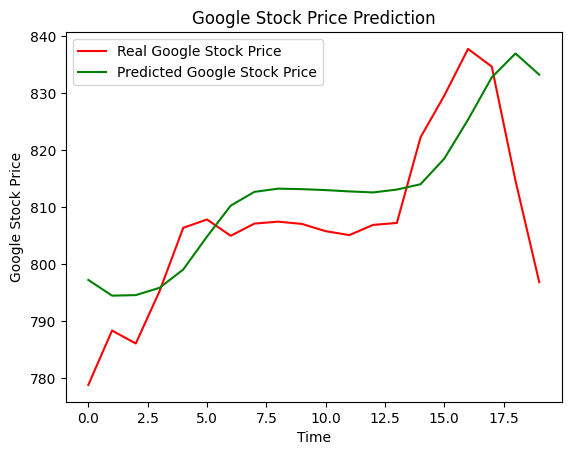

In [75]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show